## Purpose and Objectives

The purpose of this project is to perform Dynamic Mode Decomposition (DMD) on an oscillating flow data, represented as grayscale images. The objective is to use DMD to analyze the dynamic behavior of the flow and gain insights into its underlying patterns and structures. The project involves applying DMD to extract the dominant modes and their temporal evolution. The results of the analysis are visualized. 


*** Note: It is recommended to use your own data for better results. Please make sure that the data is not highly nonlinear and has limited frequencies for optimal DMD performance.

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from PIL import Image
import glob


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [4, 8]

In [71]:
# Load a list of images
images = [cv2.imread(file) for file in glob.glob("*.png")]

# Convert each image into a 1D array of pixel values
data = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).flatten() for image in images]

# Stack the 1D arrays as columns in a 2D numpy array
data = np.column_stack(data)

In [72]:
# Load the data generated from video frames
print(data.shape)
Width = 400
Height = 200

(80000, 6)


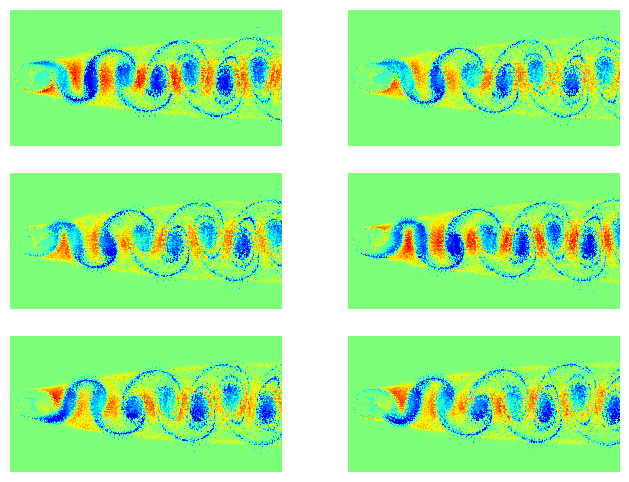

In [92]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
ax = ax.ravel()

data_ = data - data.mean(axis=1, keepdims=True)

for i in range(6):
    img = np.array(np.real(np.reshape(data_[: , i],(Height,Width))))
    ax[i].imshow(img , 'jet')

    ax[i].axis('off')

plt.show()


In [75]:
def DMD(X, Xprime, r):
    """
    Parameters:
    -----------
    X : numpy array
        The input data array, where each column represents a measurement at a time step.
    Xprime : numpy array
        The shifted input data array, where each column represents a measurement at a time step shifted by one relative to X.
    r : int
        The number of dynamic modes to retain in the computation, must be less than or equal to the number of columns in X.

    Returns:
    --------
    Phi : numpy array
        The eigenvectors, where each column represents the spatial structure of a dynamic mode.
    Lambda : numpy array
        The eigenvalues, where each value represents the exponential decay rate of a dynamic mode.
    b : numpy array
        The coefficients that linearly combine the dynamic modes to form the original data.
    """
    # Perform SVD on the input data array X
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)
    
    # Retain only the top r columns of U, Sigma, and VT
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    
    # ploting the semilog to check the portion that we want to keep
    plt.semilogy(np.diag(Sigma))
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Semilogy Plot')
    plt.show()
    
    # Compute the reduced order dynamic matrix
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ Xprime @ VTr.T).T).T 
    
    # Compute the eigenvalues and eigenvectors of Atilde
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)
    
    # Compute the dynamic mode components Phi
    Phi = Xprime @ np.linalg.solve(Sigmar.T, VTr).T @ W 
    
    # Compute the coefficients b
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    
    return Phi, Lambda, b


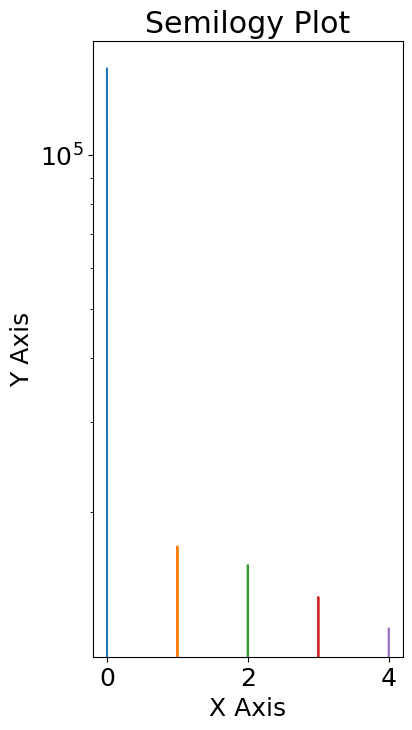

In [93]:
X = data.copy()
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],3)

In [81]:
Phi.shape

(80000, 3)

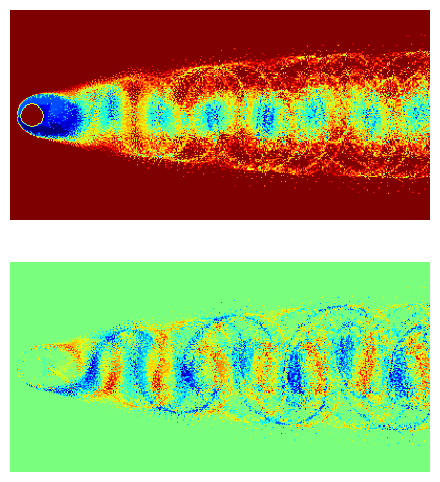

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
ax = ax.ravel()




for i in range(2):
    
    img = np.array(np.real(np.reshape(Phi[:,i],(Height,Width))))

    ax[i].imshow(img , 'jet')

    ax[i].axis('off')

plt.show()

